In [1]:
# Importing necessary libraries

import sqlite3 as sql
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot

In [2]:
# Creating the path to access the kaggle dataset

path = kagglehub.dataset_download("luizpaulodeoliveira/imdb-project-sql")

# To show what files are stored in the kaggle dataset
print(os.listdir(path))

['IMDB SQL project.txt', 'movies.sqlite', 'sqlite.9.sql']


In [3]:
# Access only the necessary database file (ie. 'movies.sqlite')
db_file = os.path.join(path, "movies.sqlite")

# Connect to the SQLite database
conn = sql.connect(db_file)
cursor = conn.cursor()

# List all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('movies',), ('sqlite_sequence',), ('directors',)]


In [4]:
# Only the tables 'director' and 'movies' will be necessary

In [5]:
# To preview table 'directors'

cursor.execute("SELECT * FROM directors LIMIT 5;")

# Print dataframe
df_directors = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(df_directors)

                name    id  gender   uid department
0      James Cameron  4762       2  2710  Directing
1     Gore Verbinski  4763       2  1704  Directing
2         Sam Mendes  4764       2    39  Directing
3  Christopher Nolan  4765       2   525  Directing
4     Andrew Stanton  4766       2     7  Directing


In [6]:
# To preview table 'movies'

cursor.execute("SELECT * FROM movies LIMIT 5;")

# Print dataframe
df_movies = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(df_movies)

      id                            original_title     budget  popularity  \
0  43597                                    Avatar  237000000         150   
1  43598  Pirates of the Caribbean: At World's End  300000000         139   
2  43599                                   Spectre  245000000         107   
3  43600                     The Dark Knight Rises  250000000         112   
4  43601                               John Carter  260000000          43   

  release_date     revenue                                     title  \
0   2009-12-10  2787965087                                    Avatar   
1   2007-05-19   961000000  Pirates of the Caribbean: At World's End   
2   2015-10-26   880674609                                   Spectre   
3   2012-07-16  1084939099                     The Dark Knight Rises   
4   2012-03-07   284139100                               John Carter   

   vote_average  vote_count  \
0           7.2       11800   
1           6.9        4500   
2          

In [7]:
### TASK ###
### Identify the top 10 highest-rated movies (by IMDb rating).

# Determine the top 10 highest-rated movies by:
# a. highest to lowest vote average; and
# b. highest to lowest vote count (if movies have the same vote average)

top_10_movies = """
SELECT id AS movie_id, title, vote_average, vote_count
FROM movies
ORDER BY vote_average DESC, vote_count DESC
LIMIT 10
"""

# Execute query
cursor.execute(top_10_movies)

# Print dataframe
df_top_10_movies = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(df_top_10_movies)

   movie_id                     title  vote_average  vote_count
0     47116          Stiff Upper Lips          10.0           1
1     47642     Dancer, Texas Pop. 81          10.0           1
2     47589                 Sardaarji           9.5           2
3     45983            One Man's Hero           9.3           2
4     45478  The Shawshank Redemption           8.5        8205
5     46567        There Goes My Baby           8.5           2
6     46934             The Godfather           8.4        5893
7     46393     The Prisoner of Zenda           8.4          11
8     44259                Fight Club           8.3        9413
9     46829              Pulp Fiction           8.3        8428


In [8]:
# IMDb ranks movies based on the average vote received.
# To identify the top 10 highest-rated movies, the list of movies must first be ordered by highest to lowest vote average.
# In the event two or more movies have the same vote average, they will be ordered by highest to lowest vote count (to prioritize movies with more votes).
# Since we only want the top 10 highest-rated movies, the top 10 rows of the dataset will be sufficient.

In [9]:
### FINDINGS ###

# A high-ranking movie generally has an average vote of 8 and above.
 
# The movies "Stiff Upper Lips", "Dancer, Texas Pop. 81", "Sardaarji", "One Man's Hero", "There Goes My Baby" and "The Prisoner of Zenda"
# are not good representations of a high-ranking movie as their vote count is less than 20, which is significantly lower than the vote count
# of the other movies in the top 10 list.

# A high vote average alone is unable to determine if the movie is popular and successful. 

In [10]:
### TASK ###
### Find the most prolific directors (directors with the most movies).

# We define a prolific director as one who has directed 20 or more movies

# Append the names of directors to the movies table by their IDs
# Count the number of movies directed per director
# Filter only the director IDs with 20 or more movies
# Create a new table for this data

prolific_director = """
SELECT d.id, d.name, COUNT(*) AS movie_count
FROM movies m
LEFT JOIN directors d ON m.director_id = d.id
GROUP BY d.id, d.name
HAVING COUNT(*) >= 20
ORDER BY movie_count DESC
"""

# Execute query
cursor.execute(prolific_director)

# Print dataframe
df_prolific_director = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(df_prolific_director)

     id              name  movie_count
0  4799  Steven Spielberg           27
1  5457       Woody Allen           21
2  4809   Martin Scorsese           20
3  5087    Clint Eastwood           20


In [11]:
# We first define a prolific director as one who has directed 20 or more movies.
# To identify prolific directors, we have to count the number of movies each director has directed based on their ID.
# We only extract the rows with director IDs that have a count of 20 or more.
# We create a relationship between the lists with the directors' IDs to find their names.

In [12]:
### FINDINGS ###

# Steven Spielberg can be said to be the most profilic, with a significant difference of movie count (count of 7)
# between himself and the others.

# A prolific director shoud be determined as one who has directed the most number of films in the span of their career,
# and not just based on the numerical figure of movies they have directed.
# ie. The highest average number of directed movies per year wil be a better determinant.

    year  vote_average_year
0   1916               7.40
1   1925               7.00
2   1927               8.00
3   1929               6.30
4   1930               6.10
..   ...                ...
85  2013               6.17
86  2014               5.99
87  2015               5.92
88  2016               5.95
89  2017               7.40

[90 rows x 2 columns]


<Axes: title={'center': 'Ratings Per Year'}, xlabel='year'>

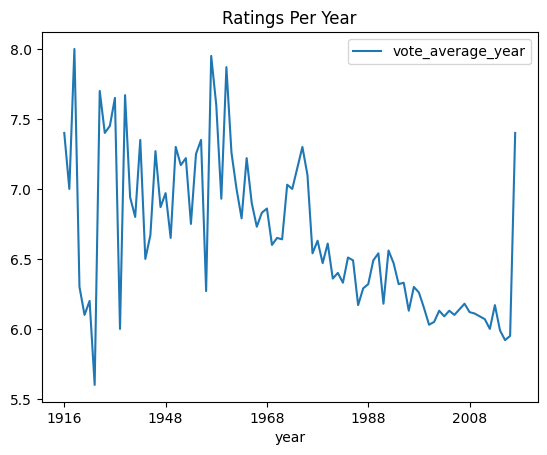

In [13]:
### TASK ###
### Determine trends in average movie ratings over the years.

# Group the movies by category "year"
# Calculate the average of all the vote_average movie ratings for each year
# List down in chronological order to analyse the trend

ratings = """
SELECT
  strftime('%Y', release_date) AS year,
  ROUND(AVG(vote_average), 2) AS vote_average_year
FROM movies
WHERE vote_count > 0
GROUP BY year
ORDER BY year
"""

# Execute query
cursor.execute(ratings)

# Print dataframe
df_ratings = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(df_ratings)

# Plot line graph to view data
df_ratings.plot(x='year', y='vote_average_year', kind='line', title='Ratings Per Year')

In [14]:
# We are only interested in the vote average of the all the movies across the years.
# A good measure to use would be to find the average of the vote average for each year.

In [15]:
### FINDINGS ###

# There is a slight downward trend for movie ratings over the years.

# The downward trend is more significant starting from year 1977 onwards until year 2016.
# However, the average rating picked up right after in year 2017 (rating of 7.4).

# The year 1927 is shown to have the highest average vote across the years.

# There was a small dip in average ratings in the year 1933 (rating of 5.6).

In [16]:
# Note: Kaggle dataset does not reflect movie genres and actors

In [17]:
# Close the connection to the SQLite database
conn.close()